In [1]:
from google.colab import files
files.upload() # kaggle.jsonをアップロード
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


  0% 0.00/8.52M [00:00<?, ?B/s]
100% 8.52M/8.52M [00:00<00:00, 140MB/s]
Archive:  novel-corona-virus-2019-dataset.zip
  inflating: covid_19_data.csv       
  inflating: time_series_covid_19_confirmed.csv  
  inflating: time_series_covid_19_confirmed_US.csv  
  inflating: time_series_covid_19_deaths.csv  
  inflating: time_series_covid_19_deaths_US.csv  
  inflating: time_series_covid_19_recovered.csv  
 Alabama  	0.394
  Alaska  	0.080
 Arizona  	0.459
 Arkansas 	0.355
California	0.274
 Colorado 	0.248
Connecticut	0.631
 Delaware 	0.387
District of Columbia	0.421
 Florida  	0.338
 Georgia  	0.375
   Guam   	0.182
  Hawaii  	0.065
  Idaho   	0.217
 Illinois 	0.441
 Indiana  	0.417
   Iowa   	0.361
  Kansas  	0.295
 Kentucky 	0.231
Louisiana 	0.563
  Maine   	0.102
 Maryland 	0.346
Massachusetts	0.672
 Michigan 	0.438
Minnesota 	0.271
Mississippi	0.524
 Missouri 	0.264
 Montana  	0.248
 Nebraska 	0.228
  Nevada  	0.339
New Hampshire	0.203
New Jersey	0.839
New Mexico	0.365
 New York 	0.80

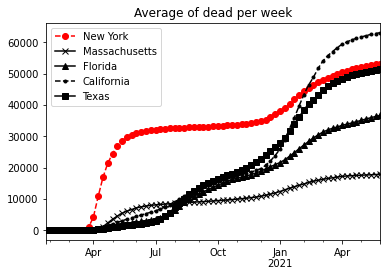

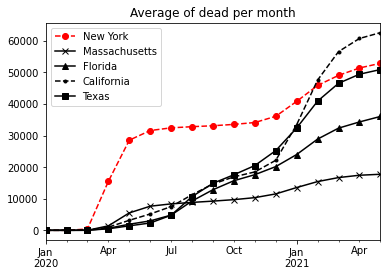

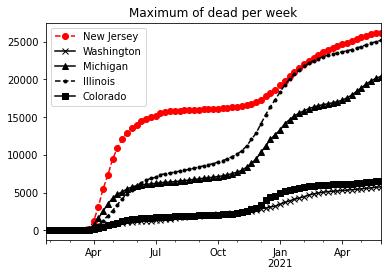

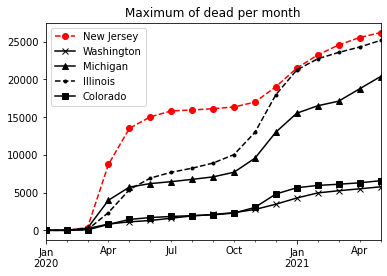

In [2]:
# プログラム2.11

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# データの準備
def prepare():
    # アメリカの新型コロナウイルスによる死者数の統計データ
    !kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset
    !unzip novel-corona-virus-2019-dataset.zip
    df = pd.read_csv('time_series_covid_19_deaths_US.csv')
    # 州名と人口、日付ごとの死者数を残す
    # 分析に使わない列
    ignores = ['Province_State', 'Population',
               'UID', 'iso2', 'iso3', 'code3',
               'FIPS', 'Admin', 'Admin2', 'Country_Region', 
               'Lat', 'Long_', 'Combined_Key']
    features = []
    for f in df.columns.values:
        if not f in ignores:
            features.append(f)
    X = df.loc[:,features].values
    y = df.loc[:,['Province_State', 'Population']].values
    return df, y, features

def main():
    df, y, features = prepare()
    # 州ごとに死者数の合計を求める
    num_death = df.groupby('Province_State')[features].sum()
    num_death_prv = num_death.sum(axis=1)
    ydf = pd.DataFrame(y, columns=['Province_State', 'Population'])
    n_pop = ydf.groupby('Province_State')['Population'].sum()
    # 州ごとに人口当たりの死者数を求める
    for prv in num_death_prv.index:
        if n_pop[prv] == 0:
            continue
        val = num_death_prv[prv] / n_pop[prv]
        if val >= 0.05: # 0.05以上のみ表示
            print('{0:^10}\t{1:.3f}'.format(prv, val))
    # グラフの線とマーカの種類と色
    style=['ro--', 'kx-', 'k^-', 'k.--', 'ks-']
    # resampleを行うため、行列を入れ替える
    ndf = num_death.transpose()
    # 列名（インデックス）を日付型に変換する
    ndf.index = pd.to_datetime(ndf.index)
    # 対象とする州を絞り込む
    mdf = pd.DataFrame(ndf, 
                      columns=['New York', 'Massachusetts',
                               'Florida', 'California', 'Texas'])
    # 1週間ごとの平均死者数を求める
    week_mdf = mdf.resample('W').mean()
    # 平均死者数の推移を可視化する
    week_mdf.plot(title='Average of dead per week', style=style)
    plt.savefig('avg_week_dead.png', dpi=400)
    # 1か月ごとの平均死者数を求める
    month_mdf = mdf.resample('M').mean()
    # 平均死者数の推移を可視化する
    month_mdf.plot(title='Average of dead per month', style=style)
    plt.savefig('avg_month_dead.png', dpi=400)
    # 対象とする州を絞り込む
    mdf = pd.DataFrame(ndf, 
                       columns=['New Jersey', 'Washington',
                                'Michigan', 'Illinois', 'Colorado'])
    # 1週間ごとの最大死者数に置き換える
    week_ndf = mdf.resample('W').max()
    # 最大死者数の推移を可視化する
    week_ndf.plot(title='Maximum of dead per week', style=style)
    plt.savefig('max_week_dead.png', dpi=400)
    # 1か月ごとの最大死者数に置き換える
    month_ndf = mdf.resample('M').max()
    # 最大死者数の推移を可視化する
    month_ndf.plot(title='Maximum of dead per month', style=style)
    plt.savefig('max_month_dead.png', dpi=400)

if __name__ == '__main__':
    main()
    